In [138]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

from keras import backend as K 

import matplotlib.pyplot as plt

K.clear_session()

In [139]:
from keras import backend as K
K.clear_session()

### Setting Up GPU as a training device

In [140]:
physical_devices = tf.config.list_physical_devices()

print(physical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [141]:
tf.config.set_visible_devices(physical_devices[1], 'GPU')

### Loading Data

In [142]:
N_TRAIN_EXAMPLES = 20000
N_TEST_EXAMPLES = 5000

CLASSES=10

In [143]:
from sklearn.model_selection import train_test_split

(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

# Concatenate train and test images
X = np.concatenate((X_train, X_test))
y = np.concatenate((Y_train, Y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=N_TRAIN_EXAMPLES, test_size=N_TEST_EXAMPLES, random_state=1)

# Getting dummy variables
y_train_fixed = np.zeros((y_train.shape[0], 10))
y_test_fixed = np.zeros((y_test.shape[0], 10))

i = 0
for [val] in y_train:
  y_train_fixed[i][val] = 1
  i += 1
  
i = 0
for [val] in y_test:
  y_test_fixed[i][val] = 1
  i += 1

### Setting up the model

AlexNet implementation in keras:

```py
  keras.Input(shape=(227, 227, 3)),
  layers.Conv2D(96, kernel_size=11, strides=4, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Conv2D(256, kernel_size=5, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Conv2D(384, kernel_size=3, padding='same', activation="relu"),
  layers.Conv2D(384, kernel_size=3, padding='same', activation="relu"),
  layers.Conv2D(256, kernel_size=3, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Dropout(0.5),
  layers.Dense(4096, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(4096, activation="relu"),
  layers.Dense(CLASSES, activation="softmax")
```

In [144]:
model = keras.Sequential(
  [
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(96, kernel_size=3, strides=1, padding='same', activation="relu"),
    layers.MaxPooling2D(pool_size=2, strides=1),
    layers.Conv2D(128, kernel_size=5, padding='same', activation="relu"),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Conv2D(128, kernel_size=3, padding='same', activation="relu"),
    layers.Conv2D(96, kernel_size=3, padding='same', activation="relu"),
    layers.Conv2D(64, kernel_size=3, padding='same', activation="relu"),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dense(CLASSES, activation="softmax"),
    
  ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 128)       307328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 96)        1

In [145]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training model

In [146]:
%%time
batch_size = 256 # Training data will be split in chunks of this size that will be passed through the network at the same time
epochs = 30 # During one epoch the model 'sees' all of the training data, with this parameter we determine how many times the model will be allowed to see them
validation_split = 0.2 # Determines what percentage of training data will be used to validate the model after each epoch
history = model.fit(X_train, y_train_fixed, batch_size=batch_size, epochs=epochs, validation_split=validation_split, shuffle=True)

Epoch 1/30
63/63 [==============================] - 6s 89ms/step - loss: 3.1714 - accuracy: 0.1248 - val_loss: 2.1818 - val_accuracy: 0.1517
Epoch 2/30
63/63 [==============================] - 5s 87ms/step - loss: 2.1399 - accuracy: 0.1842 - val_loss: 2.0011 - val_accuracy: 0.2415
Epoch 3/30
63/63 [==============================] - 5s 85ms/step - loss: 2.0033 - accuracy: 0.2367 - val_loss: 1.9283 - val_accuracy: 0.2600
Epoch 4/30
63/63 [==============================] - 5s 85ms/step - loss: 1.9017 - accuracy: 0.2749 - val_loss: 1.8455 - val_accuracy: 0.3217
Epoch 5/30
63/63 [==============================] - 5s 85ms/step - loss: 1.7931 - accuracy: 0.3252 - val_loss: 1.6058 - val_accuracy: 0.4142
Epoch 6/30
63/63 [==============================] - 5s 85ms/step - loss: 1.6310 - accuracy: 0.4006 - val_loss: 1.4610 - val_accuracy: 0.4647
Epoch 7/30
63/63 [==============================] - 5s 85ms/step - loss: 1.5071 - accuracy: 0.4367 - val_loss: 1.4528 - val_accuracy: 0.4748
Epoch 8/30
63

In [147]:
# Evaluate the model

loss, score = model.evaluate(X_test, y_test_fixed)

print(loss, score)

157/157 [==============================] - 1s 5ms/step - loss: 0.9873 - accuracy: 0.6810
0.9873302578926086 0.6809999942779541


Text(0.5, 1.0, 'Loss Curves')

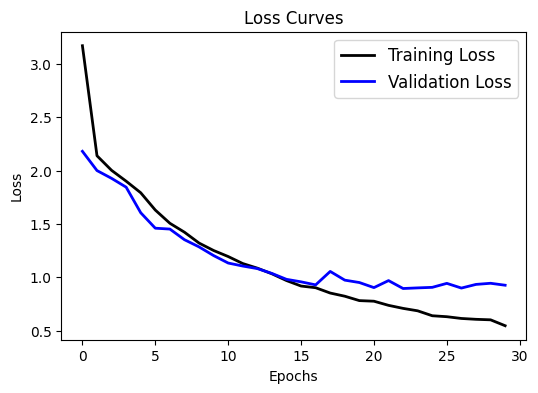

In [148]:
# Plotting the loss curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

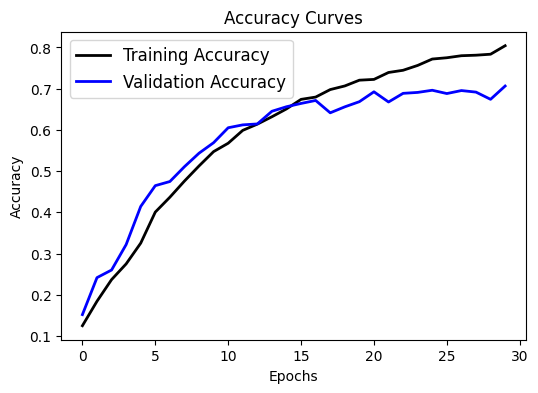

In [149]:
# Plotting the accuracy curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### Saving model to file

In [150]:
model.save("models/cifar10_test_model.keras")